In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

# Loading data

In [5]:
# Open files
X_train = pd.read_csv('data/challenge_fichier_dentrees_dentrainement_challenge_nba/train.csv')
Y_train = pd.read_csv('data/challenge_fichier_de_sortie_dentrainement_challenge_nba.csv', sep=';')
X_test = pd.read_csv('data/challenge_fichiers_dentrees_de_test_challenge_nba/test.csv')

# Data description

In [6]:
# Parameters
nb_games_train = len(X_train)
nb_games_test = len(X_test)
print("Number of games (train): {}".format(nb_games_train))
print("Number of games (test): {}".format(nb_games_test))

Number of games (train): 12576
Number of games (test): 4192


Dataset from the 15 last NBA seasons.
One line = one game described by every second (1440) of the first half of the game. Every second is described by 11 variables (11x1440 = 15840 columns).
The variables are the following:
* score
* offensive rebound
* defensive rebound
* offensive foul
* defensive foul
* assist
* lost ball
* steals
* bad pass
* block
* miss

They represent the difference between indicators of invited team - home team.

Winning team is 1 if it's the invited team, 0 oterhwise.

In [7]:
X_train.head()

,ID,score_1,offensive rebound_1,defensive rebound_1,offensive foul_1,defensive foul_1,assist_1,lost ball_1,steals_1,bad pass_1,...,offensive rebound_1440,defensive rebound_1440,offensive foul_1440,defensive foul_1440,assist_1440,lost ball_1440,steals_1440,bad pass_1440,block_1440,miss_1440
0,14186,-2,0,0,0,0,0,0,0,0,...,8,-4,2,0,-3,3,3,-2,1,9
1,13013,0,0,-1,0,0,0,0,0,0,...,1,5,0,0,1,0,0,1,-2,-1
2,7102,0,0,0,0,0,0,0,1,1,...,-1,-5,-5,0,0,5,5,-2,3,-5
3,7637,-2,0,0,0,0,0,0,0,0,...,2,8,1,0,-1,-1,2,2,-1,-1
4,12350,0,0,0,0,0,0,0,0,0,...,4,1,0,0,4,3,2,1,1,3
5,4243,3,0,0,0,0,1,0,0,0,...,-7,2,0,0,16,-2,-5,-4,-2,-5
6,5202,2,0,0,0,0,0,0,0,0,...,2,4,0,0,3,1,2,3,0,0
7,17817,2,0,0,0,0,1,0,0,0,...,-5,1,0,0,5,1,0,-1,-2,-4
8,2422,2,0,0,0,0,1,0,0,0,...,2,-5,-2,0,10,-2,-2,0,3,5
9,2147,0,0,0,0,0,0,0,0,0,...,1,-4,-5,0,4,4,4,0,-2,3


In [9]:
Y_train.head(10)

,ID,label
0,14186,0
1,13013,0
2,7102,0
3,7637,1
4,12350,0
5,4243,1
6,5202,0
7,17817,0
8,2422,0
9,2147,1


# Data exploration

**Reference metric : based on the score at the end of the second quarter**

In [37]:
# Prediction
score_nd_quarter = X_train['score_1440'].as_matrix()
winner_nd_quarter = np.ones(nb_games_train)*(score_nd_quarter[:] > 0)

# Ground Truth
winner = Y_train['label'].as_matrix()

# Accuracy
ref = accuracy_score(winner,winner_nd_quarter)

print('Reference accuracy : {:.1f}%'.format(ref*100))

Reference accuracy : 72.1%


**If using score at the end of the first quater**

In [38]:
# Prediction
score_st_quarter = X_train['score_720'].as_matrix()
winner_st_quarter = np.ones(nb_games_train)*(score_st_quarter[:] > 0)

# Accuracy
ref = accuracy_score(winner,winner_st_quarter)

print('Accuracy at the end of the first quater: {:.1f}%'.format(ref*100))

Accuracy at the end of the first quater: 64.9%


**Using score at time t to predict the winner at the end of the game**

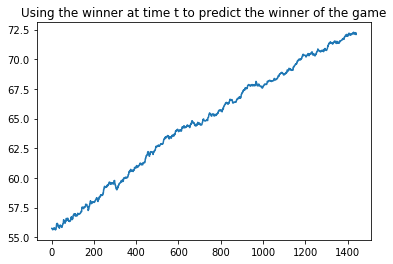

In [39]:
def score_winner(score_at_t, winner):
    '''What if using score at time t to predict the winner at the end of the game ?'''
    acc = np.mean((score_at_t>0) == winner)
    return 100*acc

history = []
for i in range(1, 1440+1, 1):
    history.append(score_winner(X_train['score_'+str(i)], winner))
    
plt.plot(range(1, 1440+1, 1), history)
plt.title("Using the winner at time t to predict the winner of the game")
plt.show()

**Using other variables at time t to predict the winner at the end of the game**

It shows a sort of correlation between some variables and the winning team. 'defensive foul' seems to have no impact on the winning team.

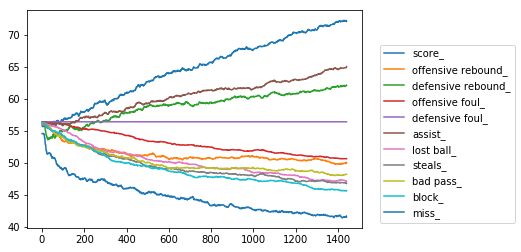

In [61]:
columns_names = ['score_', 
                 'offensive rebound_', 'defensive rebound_', 
                 'offensive foul_', 'defensive foul_',
                 'assist_',
                 'lost ball_', 'steals_',
                 'bad pass_', 'block_', 'miss_']

plt.figure()

for variable in columns_names:
    history = []
    for i in range(1, 1440+1, 1):
        history.append(score_winner(X_train[variable+str(i)], winner))
    plt.plot(range(1, 1440+1, 1), history, label = variable)

plt.legend(loc = 'lower left', bbox_to_anchor = (1.04,0))
plt.show()

# First predictions
**First test : decision tree classifier**

In [63]:
# Separate train / validation
n_train = int(0.7*nb_games_train)
n_val = nb_games_train - n_train

id_train = np.random.choice(nb_games_train, n_train, replace=False)

X_portion_train = X_train.as_matrix()[id_train,:][:,1:]
X_portion_val = np.delete(X_train.as_matrix(), id_train, axis = 0)[:,1:]

Y_portion_train = Y_train.as_matrix()[id_train,:][:,1]
Y_portion_val = np.delete(Y_train.as_matrix(), id_train, axis = 0)[:,1]

# Normalize data
X_portion_train = normalize(X_portion_train, norm='l2', axis=1)
X_portion_val = normalize(X_portion_val, norm='l2', axis=1)

In [64]:
# Decision Tree
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_portion_train, Y_portion_train)
print(clf.score(X_portion_val,Y_portion_val))

0.7158759607739199
